# Lab ML for Data Science: Part 1 | **Getting Insights into an Unsupervised Dataset**

Team Members: Prajna Narayan Bhat, Neeraj Omprakash Chauhan, Akash Skaria Koottungal

## 1. Loading the Data, Preprocessing, Initial Data Analysis

Dataset Used: UCI Wholesale customers dataset

https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance_matrix
from sklearn.neighbors import NearestNeighbors
import mplcursors
from sklearn.manifold import TSNE

In [2]:
#loading the dataset
df = pd.read_csv('/content/Wholesale customers data.csv')
org_df = df.copy()

In [3]:
#datatypes of feature variables
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [4]:
#display data
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
#dropping the meta-data columns
df.drop(['Channel','Region'],axis=1,inplace=True)

In [6]:
N = df.shape[0] #no. of rows
d = df.shape[1] #no.of columns

In [7]:
#statistical description of data
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
#dataframe shape
df.shape

(440, 6)

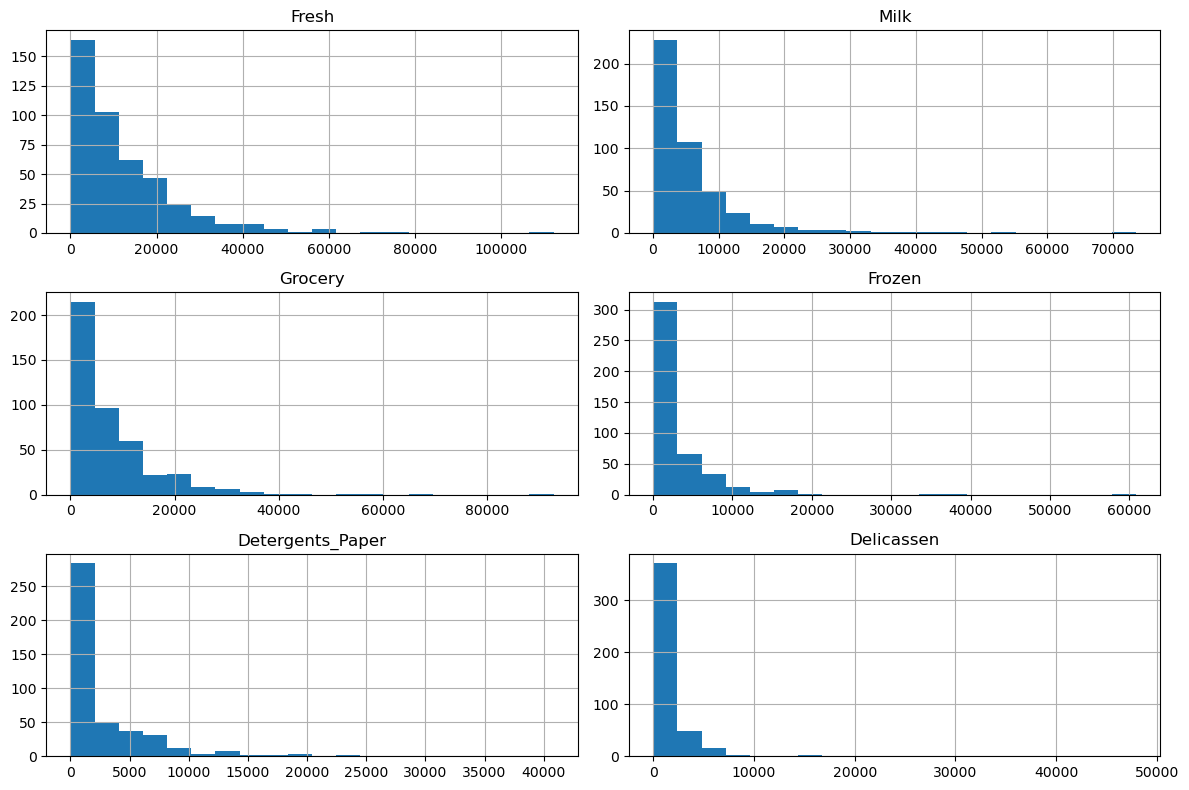

In [9]:
#plot histograms of features
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

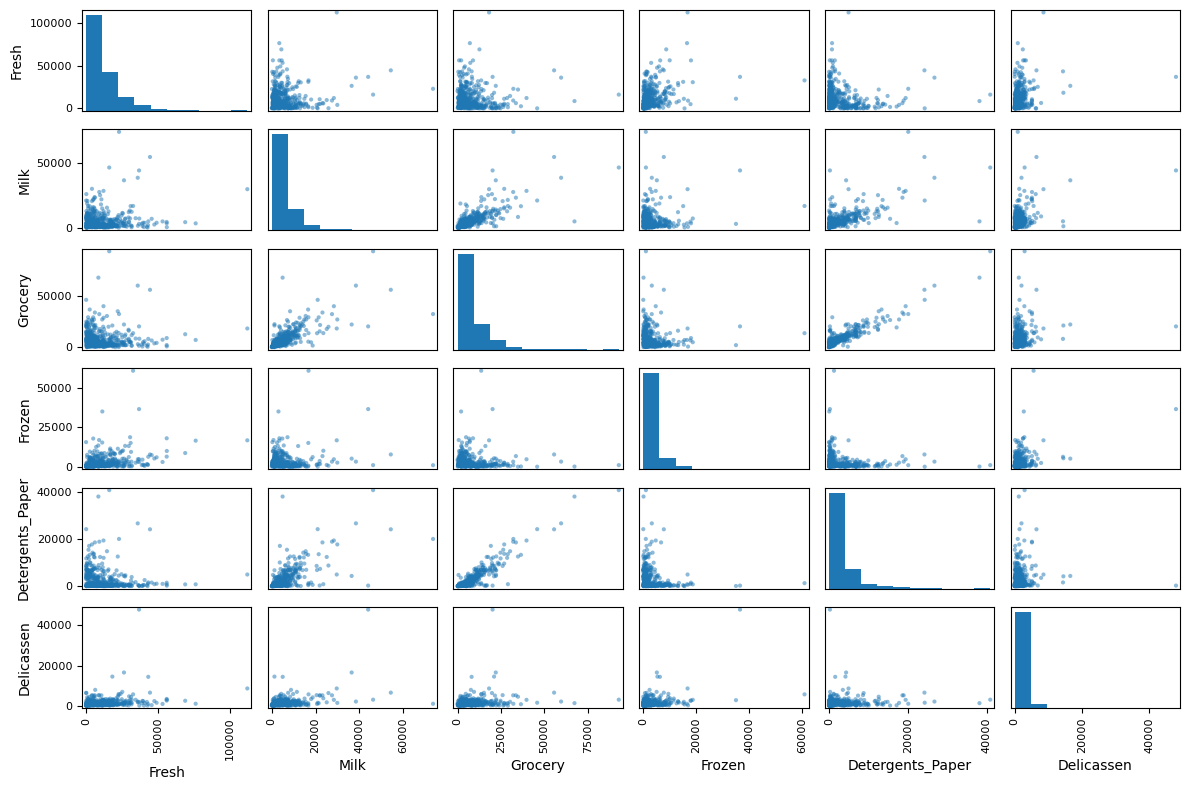

In [10]:
#scatter plot between features
pd.plotting.scatter_matrix(df, figsize=(12, 8))
plt.tight_layout()
plt.show()

> Non-linear transformation on the data to prevent heavy tailed distributions : x ⟶ log(x + θ)

In [11]:
#theta values for non-linear transformation
theta_arr = [1,100]

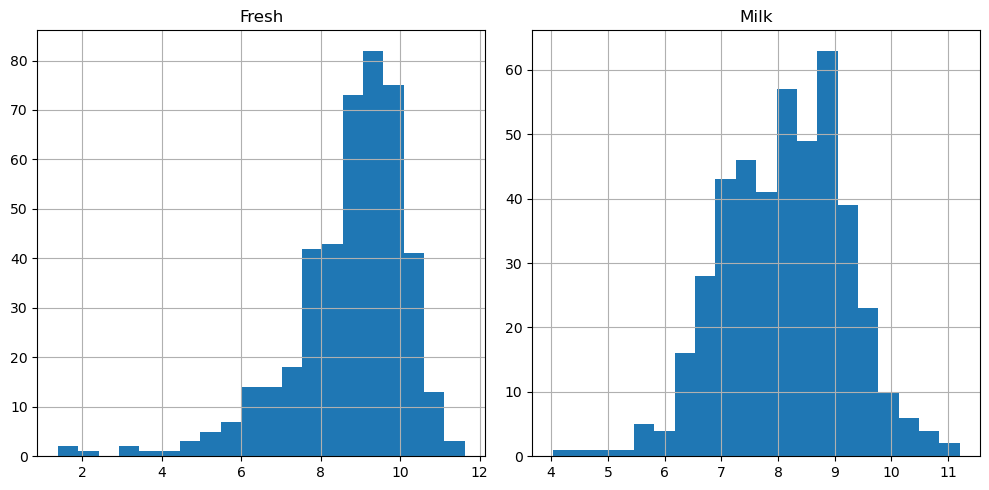

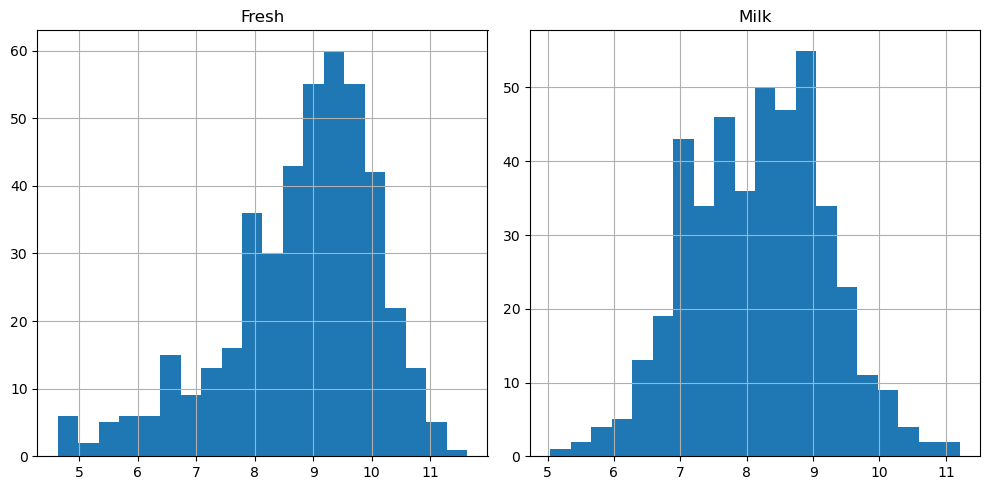

In [12]:
#plot histograms to analyse effect of transformation for theta values
for theta in theta_arr:
  df_dummy = np.log(theta + df[['Fresh','Milk']])

  df_dummy.hist(figsize=(10, 5), bins=20)
  plt.tight_layout()


plt.show()

In [13]:
#Visually analysing the graphs for various theta values, theta=1 seems to produce a better guassian curve than the rest
optimal_theta=1
df = np.log(optimal_theta + df[df.columns])

In [14]:
#resulting dataframe after transformation
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718
...,...,...,...,...,...,...
435,10.299037,9.396986,9.682092,9.483112,5.209486,7.698483
436,10.577172,7.266827,6.639876,8.414274,4.543295,7.760893
437,9.584108,9.647885,10.317053,6.082219,9.605216,7.532624
438,9.239025,7.591862,7.711101,6.946014,5.129899,7.661998


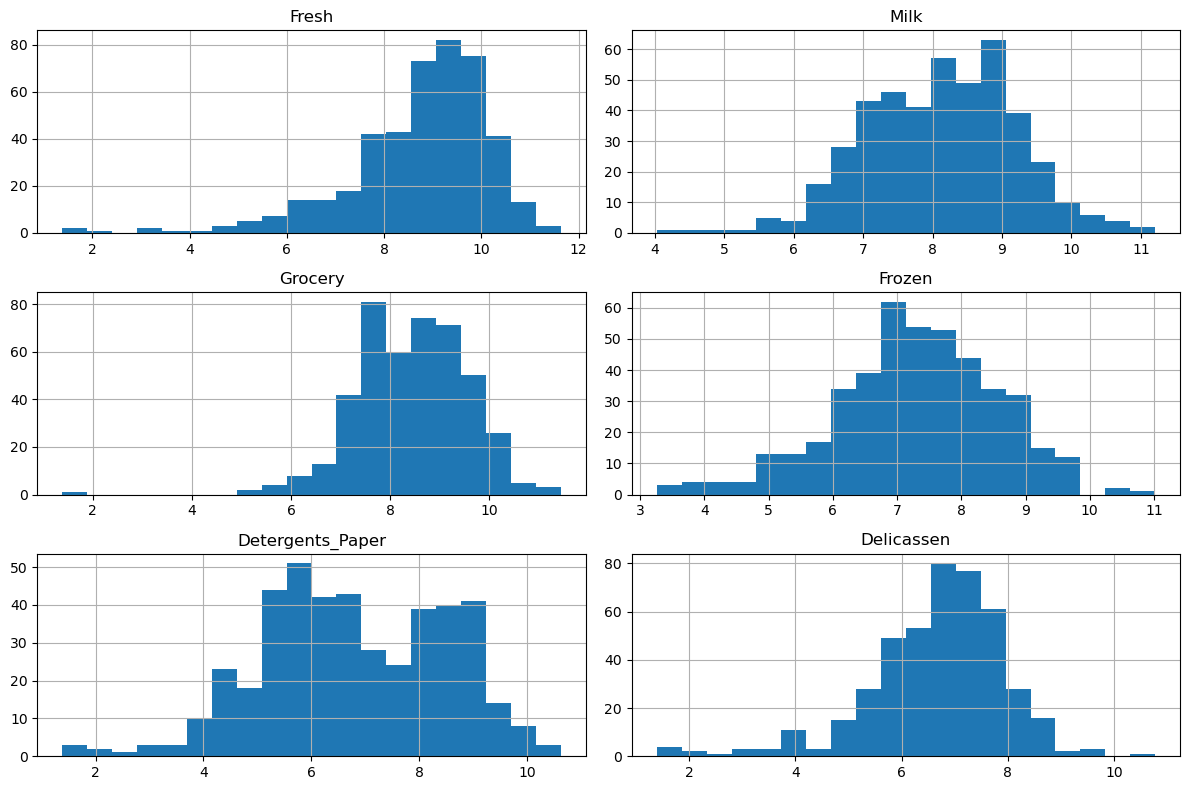

In [15]:
#histogram of features post tranformation
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

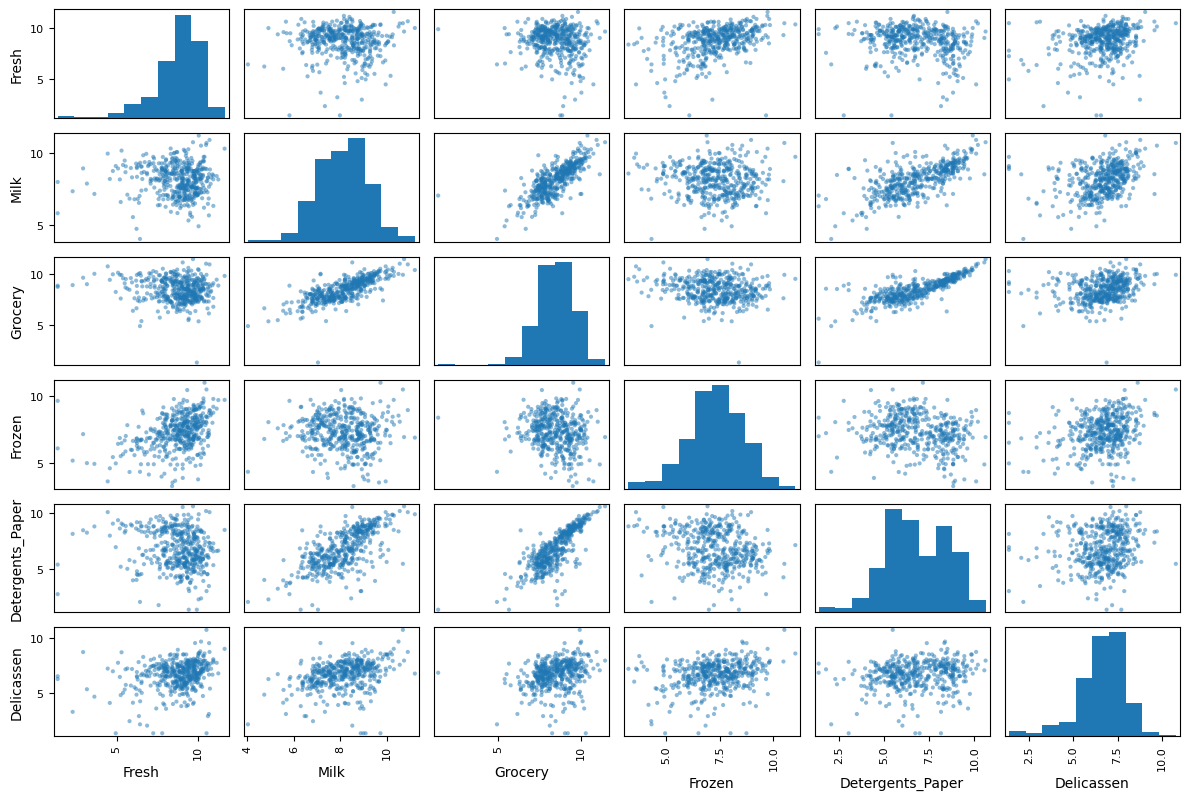

In [16]:
#scatter plot between features post transformation
pd.plotting.scatter_matrix(df, figsize=(12, 8))
plt.tight_layout()
plt.show()

## 2. Detecting Anomalies

- Anomaly Detection by finding neighbors for each data point.
- Anomaly measured using squared distance to the nearest neighbor.
\begin{equation}
    z_{jk} = \|x_j - x_k\|^2
\end{equation}
- Outlier score obtained by perfoming minimum over the N-1 remaining points in the data.
\begin{equation}
    y_j = \min_{k \neq j} z_{jk}
\end{equation}

In [17]:
#Find nearest Neighbors
nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(df)
distances, indices = nbrs.kneighbors(df)
anomaly_scores = distances[:, 1]

In [18]:
#sorting in descending order to find anomalous instances
sorted_indices = np.argsort(anomaly_scores)[::-1]
top_n_anomalous_instances = sorted_indices[:10]

In [19]:
#top 10 anomalous instances
top_n_anomalous_instances

array([338,  75, 154, 142,  95, 187, 128, 183, 204, 109], dtype=int64)

In [20]:
#Feature values of the top 10 anomalous instances
for idx in top_n_anomalous_instances:
    print("Instance Index:", idx)
    print("Spending across categories:")
    print(df.iloc[idx])
    print("-----------------------------------------")

Instance Index: 338
Spending across categories:
Fresh               1.386294
Milk                5.811141
Grocery             8.856803
Frozen              9.655154
Detergents_Paper    2.772589
Delicassen          6.311735
Name: 338, dtype: float64
-----------------------------------------
Instance Index: 75
Spending across categories:
Fresh               9.923241
Milk                7.037028
Grocery             1.386294
Frozen              8.391176
Detergents_Paper    1.386294
Delicassen          6.883463
Name: 75, dtype: float64
-----------------------------------------
Instance Index: 154
Spending across categories:
Fresh               6.434547
Milk                4.025352
Grocery             4.927254
Frozen              4.330733
Detergents_Paper    2.079442
Delicassen          2.197225
Name: 154, dtype: float64
-----------------------------------------
Instance Index: 142
Spending across categories:
Fresh               10.519673
Milk                 8.875287
Grocery              9.0

### 2.1 Robust anomaly models

- For robust anomaly model, replacing the hard minimum by a soft minimum


In [21]:
#softmin funtion for robust anomaly detection
def soft_min(distances, gamma, epsilon=1e-10):
    gamma=gamma+epsilon
    return -1/gamma * np.log(np.mean(np.exp(-gamma * distances)))

In [22]:
#generate anomaly scores using softmin function
def gen_anomaly_scores(df,gamma):
    dist_matrix = distance_matrix(df.values, df.values)
    anomaly_scores = []
    for i in range(len(df)):
        distances = np.delete(dist_matrix[i], i)  # Remove the distance to itself
        score = soft_min(distances, gamma)
        anomaly_scores.append(score)
    return np.array(anomaly_scores)

In [23]:
#random gamma value
gamma = 0.1

#anomaly scores
anomaly_scores1 = gen_anomaly_scores(df,gamma)
print("Anomaly scores:", anomaly_scores1)

Anomaly scores: [3.86520735 3.39060393 3.9737046  3.46930364 3.76366239 3.26918002
 3.44496386 3.36819644 3.26345728 3.9053321  3.81032546 3.19824381
 4.34837795 3.90296063 4.19387476 3.49232993 4.55789286 3.62540391
 3.56843649 3.32610145 3.30695685 3.38797358 4.1579504  5.42033261
 4.18274904 4.76176059 3.35437453 4.02397591 4.58454843 3.49400241
 3.4895083  3.15563628 3.79385473 3.61281469 3.73576718 4.11441918
 3.63194233 3.76549845 5.46211376 4.88402387 4.04194605 3.42819818
 5.16193359 5.31627741 4.42914068 4.45050491 4.00005245 6.36469237
 3.6094406  4.48837273 3.43237846 3.72018916 3.72822327 4.64109499
 3.57584936 3.07105725 4.80710187 5.18340695 3.54128209 4.04861234
 4.46153225 5.78679466 3.43419389 3.88474077 3.27322877 7.53168128
 8.15625647 3.65367519 3.70429906 3.68015336 3.99741156 4.92039949
 3.85955265 3.57269829 3.19635491 9.32285364 4.09940637 4.32167396
 3.62264018 3.41036898 3.51576027 5.51645915 3.57849792 3.26629068
 3.84164899 6.12598639 5.50707098 4.6599499  5

In [24]:
#sorting in descending order to obtain top anomalous instances
ind=np.argsort(anomaly_scores1)[::-1]
ind[:10]

array([154, 338,  75,  66,  95,  65, 128, 142, 218, 357], dtype=int64)

### 2.2 Selecting a suitable parameter γ

- Using bootstrap method create multiple variants of the dataset
- Compute anomaly scores for each variant of the dataset
- Characterize anomalousness using the average and spread of the anomaly scores
- Later, to find suitable parameter γ, plot anomaly average and spread for each sample and inspect the seperability visually.

In [25]:
#bootstrap samples of dataset
def gen_bootstrap_samples(df, num_samples):
    bootstrap_samples=[]
    for i in range(num_samples):
        # Generate bootstrap sample by sampling with replacement
        sample = df.sample(n=len(df),replace=True)
        bootstrap_samples.append(sample)
    return bootstrap_samples

In [26]:
#array of gamma values
gamma_values = np.array([0.1,0.3,0.7,0.8,0.9,1,8,9,10])
n_neighbors=2

#generate anomaly scores mean and spread for different gamma values
def characterize_anomalies(bootstrap_samples, gamma_values):
    anomaly_stats = []
    for gamma in gamma_values:
        for sample in bootstrap_samples:
            anomaly_scores = gen_anomaly_scores(sample, gamma)

            anomaly_mean = np.mean(anomaly_scores)
            anomaly_std = np.std(anomaly_scores)

            anomaly_stats.append((gamma, anomaly_mean, anomaly_std))
    return anomaly_stats

In [27]:
# Generate bootstrap samples
num_samples = 100
bootstrap_samples = gen_bootstrap_samples(df, num_samples)

# Characterize anomalies
anomaly_stats = characterize_anomalies(bootstrap_samples, gamma_values)

Average Combined Metric: 0.970219093244523
Optimal (gamma, mean, std): gamma    1.000000
mean     3.306979
std      0.697066
Name: 573, dtype: float64


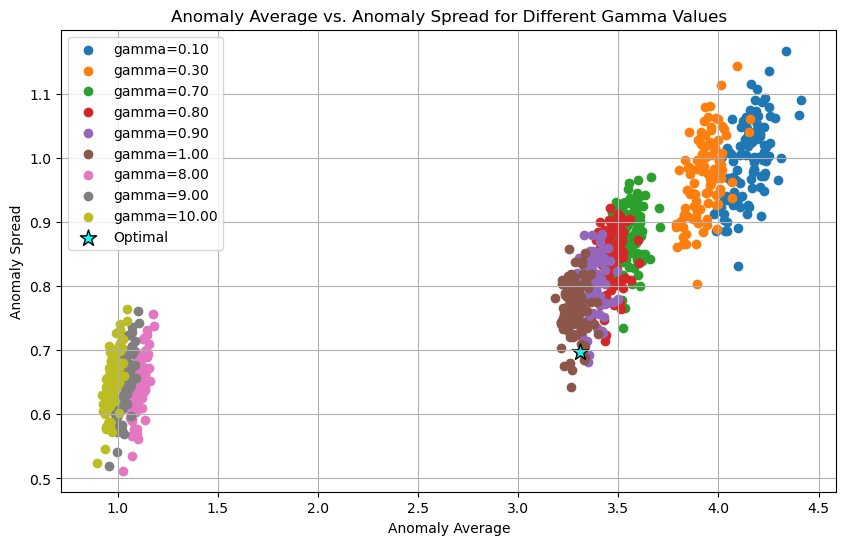

In [28]:
#plot anomaly stats for different gamma values to
def plot_anomaly_stats(anomaly_stats):
    # Convert to DataFrame for easier handling
    anomaly_stats_df = pd.DataFrame(anomaly_stats, columns=['gamma', 'mean', 'std'])

    # Normalize the mean and standard deviation
    anomaly_stats_df['normalized_mean'] = (anomaly_stats_df['mean'] - anomaly_stats_df['mean'].min()) / (anomaly_stats_df['mean'].max() - anomaly_stats_df['mean'].min())
    anomaly_stats_df['normalized_std'] = (anomaly_stats_df['std'] - anomaly_stats_df['std'].min()) / (anomaly_stats_df['std'].max() - anomaly_stats_df['std'].min())

    # Calculate the combined metric (you can adjust the weights if needed)
    anomaly_stats_df['combined_metric'] = anomaly_stats_df['normalized_mean'] + anomaly_stats_df['normalized_std']

    average_combined_metric = anomaly_stats_df['combined_metric'].mean()

    # Find the closest gamma to the average combined metric
    anomaly_stats_df['metric_diff'] = np.abs(anomaly_stats_df['combined_metric'] - average_combined_metric)
    optimal_index = anomaly_stats_df['metric_diff'].idxmin()
    optimal_tuple = anomaly_stats_df.iloc[optimal_index]

    # Display the average combined metric and the optimal tuple
    print("Average Combined Metric:", average_combined_metric)
    print("Optimal (gamma, mean, std):", optimal_tuple[['gamma', 'mean', 'std']])

    # Plot each gamma's mean and std deviation
    plt.figure(figsize=(10, 6))
    plt.subplot()
    for gamma in anomaly_stats_df['gamma'].unique():
        subset = anomaly_stats_df[anomaly_stats_df['gamma'] == gamma]
        plt.scatter(subset['mean'], subset['std'], label=f'gamma={gamma:.2f}')

    plt.scatter(optimal_tuple['mean'], optimal_tuple['std'], c='cyan', s=150, edgecolors='black', label='Optimal',marker='*')
    plt.xlabel('Anomaly Average')
    plt.ylabel('Anomaly Spread')
    plt.title('Anomaly Average vs. Anomaly Spread for Different Gamma Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the anomaly statistics
plot_anomaly_stats(anomaly_stats)

In [29]:
# Select optimal gamma based on visual inspection or evaluation metric
optimal_gamma = 1.0

# Recompute anomaly model using the optimal gamma on the entire dataset
final_anomaly_scores = gen_anomaly_scores(df,optimal_gamma)

In [30]:
#top 10 anomalous instances
ind=np.argsort(final_anomaly_scores)[::-1]
ind[:10]

array([338, 154,  75,  95, 142,  66, 128, 218, 109,  65], dtype=int64)

## 3. Getting Insights into Anomalies

### 3.1 Relation between Anomalies and Meta-Data

- Using the Region attribute for creating subsets of data
- Plot distribution of anomaly scores on different subsets of data and understand the differences

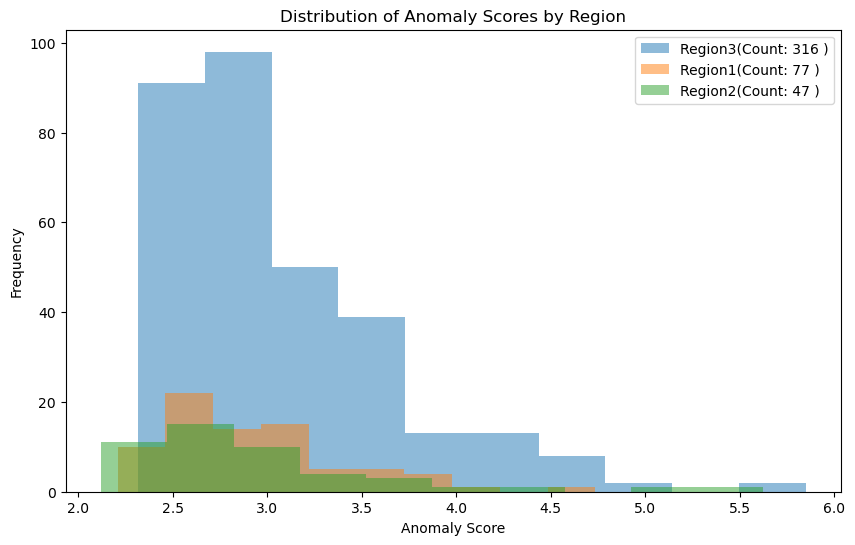

In [31]:
column = 'Region'
regions=org_df[column].unique()  #unique values in Region column

plt.figure(figsize=(10, 6))

# Plot histograms for each location
for region in regions:
    df1=org_df[org_df[column] == region].loc[:,org_df.columns!=column] #creating subsets of the dataframe using regions
    df1 = np.log(theta + df1[df1.columns])                             #applying log transformation on the dataframe
    count=df1.shape[0]                                                 #count of elements in each region
    anomaly_scores_reg=gen_anomaly_scores(df1,optimal_gamma)           #anomaly scores of the region
    #print(anomaly_scores_reg)
    #subset = org_df[org_df['Region'] == region]
    plt.hist(anomaly_scores_reg, alpha=0.5, label= column+f'{region}'+f'(Count: {count} )', bins=10)  #histogram of the anomaly scores by region

plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores by '+column)
plt.legend()
plt.show()

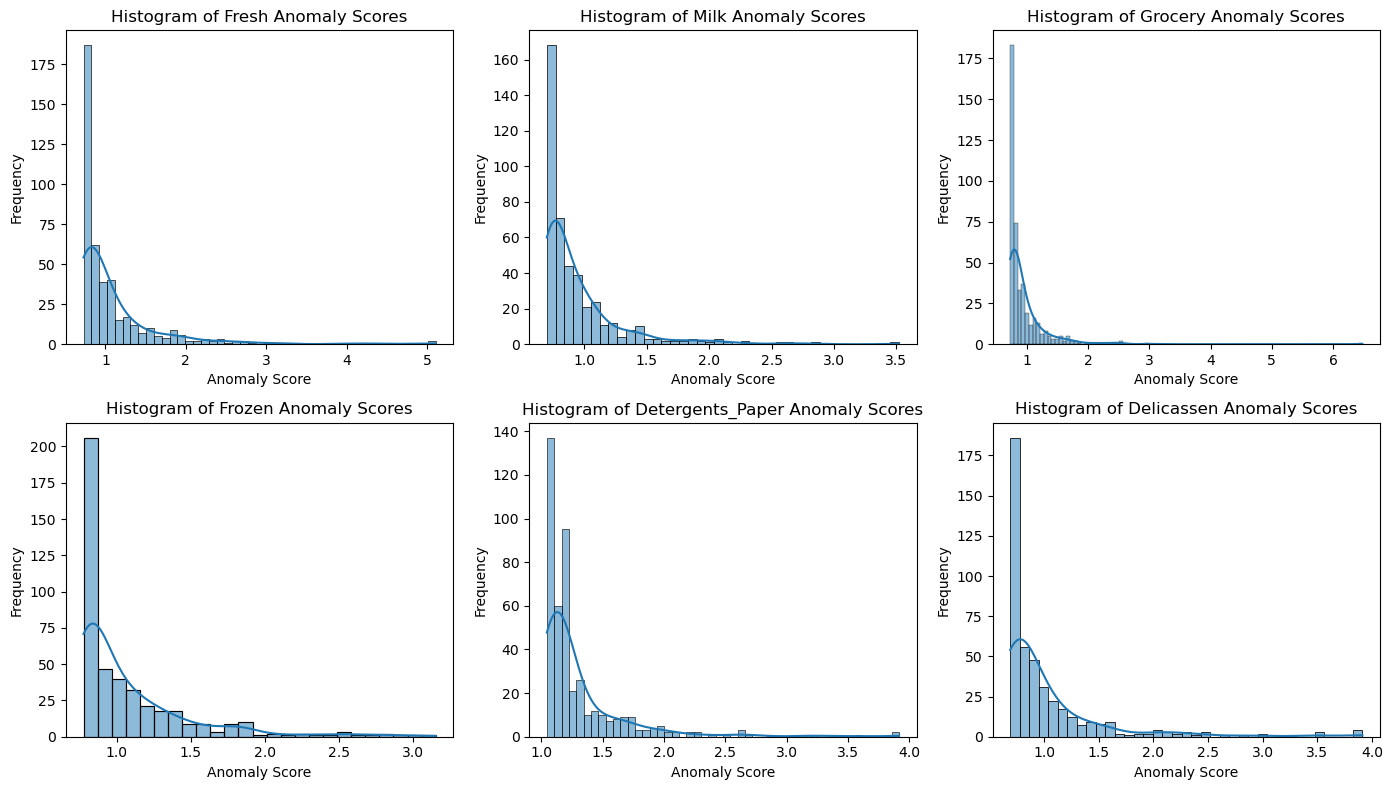

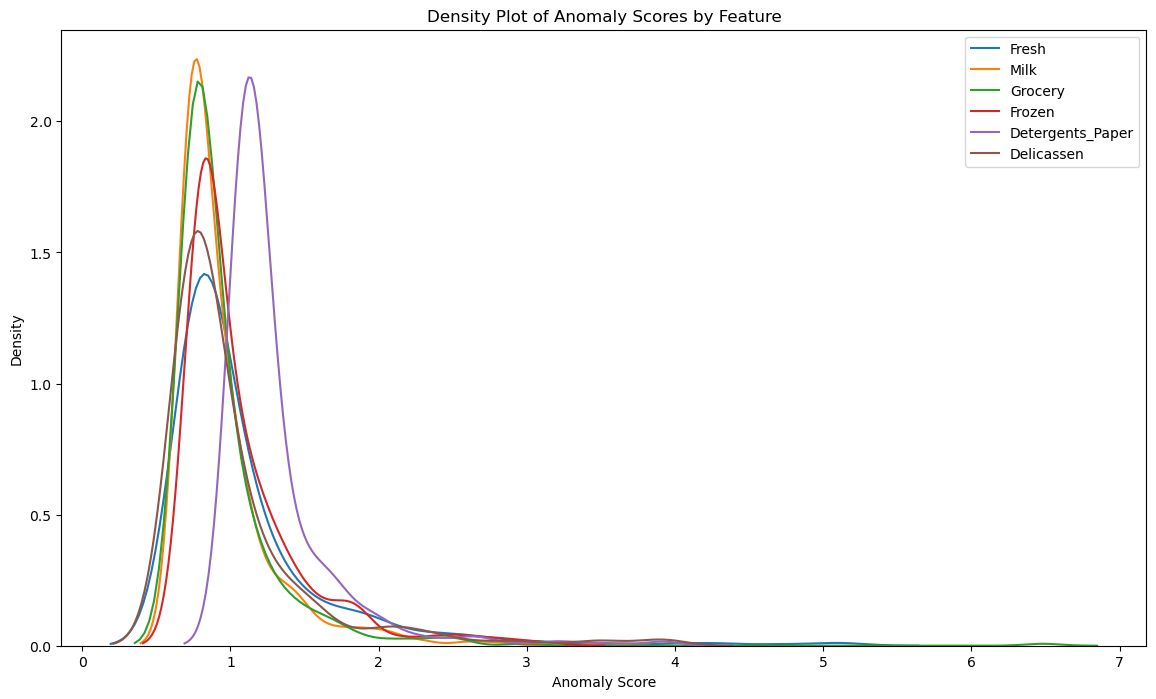

In [32]:
anomaly_scores=pd.DataFrame()
for col in df.columns:
  anomaly_scores[col]=gen_anomaly_scores(pd.DataFrame(df[col]),optimal_gamma)  #anomaly scores of each column

plt.figure(figsize=(14, 8)) #figure size

for i, column in enumerate(anomaly_scores.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(anomaly_scores[column], kde=True) #histogram of anomaly scores of each feature variable
    plt.title(f'Histogram of {column} Anomaly Scores')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Set up the figure for density plots
plt.figure(figsize=(14, 8))

for column in anomaly_scores.columns:
    sns.kdeplot(anomaly_scores[column], label=column) #kernel density plot of the anomaly scores of each feature variable

plt.title('Density Plot of Anomaly Scores by Feature')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.legend()
plt.show()


By looking at the curves above, we can say that Groceries have the highest number of anomalies, followed by Fresh.

### 3.2  Indentifying Input Features that Drive Anomaly

- Layer-wise Relevance Propagation Method (Attribution of anomaly scores to the input features)

- 1) Contribution of each data point *i*
to the anomaly score of instance *j*
\begin{equation}
R^{(j)}_k = \frac{\exp(-\gamma z_{jk})}{𝚺_{k \neq j} \exp(-\gamma z_{jk})}\cdot y_j
\end{equation}

- 2) Contribution of input feature *i* to the anomaly score of instance *j*
\begin{equation}
R^{(j)}_i = 𝚺 _{k \neq j}\frac{[x_k - x_j]^2_i}{||x_k - x_j||^2} \cdot R^{(j)}_k
\end{equation}

In [33]:
dist_matrix = distance_matrix(df.values, df.values)  #distance matrix

#compute contribution of each data point i to the anomaly score of instance j
def compute_Rkj(df,final_anomaly_scores,gamma):
    Rkj = np.zeros((N,N))   #NxN matrix with zeros

    k = np.exp(-gamma * dist_matrix)
    for i in range(N):
        Rkj[i] = (k[i]/(np.sum(k[i])-1))*final_anomaly_scores[i]
    return Rkj

In [34]:
Rkj = compute_Rkj(df,final_anomaly_scores,optimal_gamma)
Rkj

array([[1.76291839e-01, 1.90593371e-02, 8.06056908e-03, ...,
        1.61377796e-02, 3.98453827e-03, 1.74231496e-03],
       [8.88242205e-03, 8.21591278e-02, 1.75837979e-02, ...,
        6.72768548e-03, 1.96139565e-03, 2.72694877e-04],
       [8.29549699e-03, 3.88298556e-02, 1.81429922e-01, ...,
        7.78492316e-03, 3.49054201e-03, 1.97867817e-04],
       ...,
       [2.71437554e-02, 2.42810924e-02, 1.27234175e-02, ...,
        2.96522983e-01, 1.04245730e-03, 4.58739008e-04],
       [2.28014414e-03, 2.40838489e-03, 1.94088795e-03, ...,
        3.54663438e-04, 1.00882656e-01, 7.48156713e-04],
       [1.07082723e-02, 3.59621880e-03, 1.18165636e-03, ...,
        1.67622478e-03, 8.03528006e-03, 1.08349010e+00]])

In [35]:
#compute contribution of input feature i to the anomaly score of instance j
def compute_Rji(df,Rkj):
    Rji = np.zeros((N, d)) #Nxd matrix of zeros

    for j in range(N):
        for i in range(d):
            contribution_sum = 0
            for k in range(N):
                if k != j:
                    diff_ik = np.square(df.values[k, i] - df.values[j, i])
                    dist_kj = np.square(dist_matrix[k, j])
                    contribution_sum += ( diff_ik / dist_kj) * Rkj[j, k]
            Rji[j, i] = contribution_sum

    return Rji

In [36]:
Rji = compute_Rji(df,Rkj)
Rji

array([[0.51373916, 0.38082186, 0.21072914, 1.28173251, 0.45464979,
        0.3474627 ],
       [0.57334775, 0.42185312, 0.24880374, 0.50364744, 0.50919103,
        0.36476943],
       [0.47864123, 0.29001599, 0.22131806, 0.41693965, 0.47388669,
        1.33022216],
       ...,
       [0.59706228, 0.35647268, 0.49660772, 0.99589715, 0.78731887,
        0.35720183],
       [0.45098018, 0.27045283, 0.20125718, 0.60691842, 0.56442285,
        0.67733146],
       [0.56759873, 0.25400257, 0.23721488, 1.70790022, 0.46532727,
        1.39970802]])

In [37]:
Rji.shape #shape of the Rji array

(440, 6)

In [38]:
#conservation property
conservation_check = np.allclose(np.sum(Rji, axis=1), final_anomaly_scores)
print(f'Conservation property holds: {conservation_check}')

Conservation property holds: True


<IPython.core.display.Javascript object>


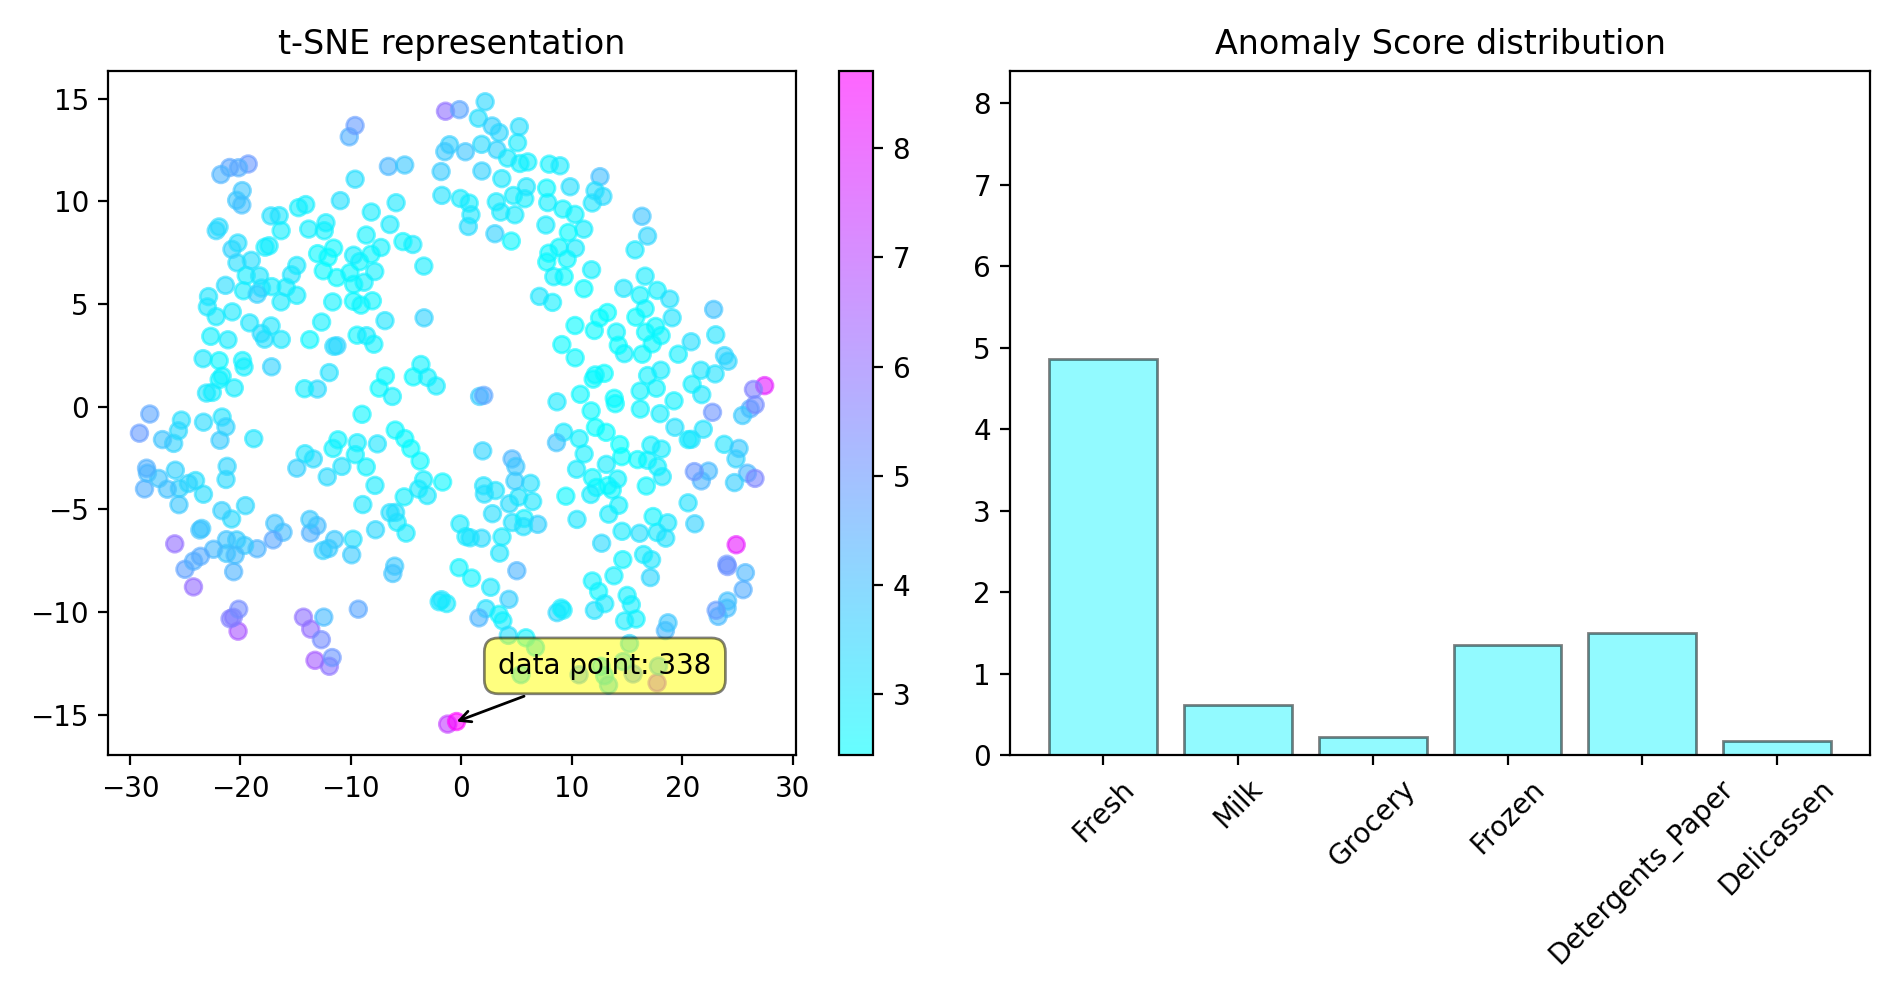

In [40]:
# t-SNE embedding with x-ai interaction
%matplotlib notebook
model = TSNE(n_components = 2, random_state = 0)
embedded_data = model.fit_transform(df)

# Visualize the t-SNE representation with a bar plot on the side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9.5, 5))
scatter = ax1.scatter(embedded_data[:, 0], embedded_data[:, 1],
                      c=np.sum(Rji, axis=1), cmap='cool', alpha=0.6)
ax1.set_title('t-SNE representation')
bar_plot = ax2.bar(df.columns, 8, color='#27F7FF', edgecolor='black', alpha=0.5)
ax2.set_title('Anomaly Score distribution')
ax2.set_xticks(np.arange(len(df.columns)))
ax2.set_xticklabels(df.columns, rotation=45)

# Function to update the bar plot based on the hovered point
def update_bar_plot(cursor):
    index = cursor.target.index
    x = int(index)
    values = Rji[x]
    for i, bar in enumerate(bar_plot):
        bar.set_height(values[i])
    txt = f'data point: {x}'
    ann = cursor.annotation
    ann.set_text(txt)
    plt.draw()

# Connect the cursor event to the update_bar_plot function
mplcursors.cursor(scatter, hover=True).connect("add", update_bar_plot)

plt.colorbar(scatter, ax=ax1)
plt.tight_layout()
plt.show()